In [ ]:
import scipy.io as io
import os
import json
!pip install mne
import mne
import gc
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn import preprocessing
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/dataset/dataset_description.json', 'r') as f:
  dataset_description = json.load(f)

print(dataset_description)


{'Name': 'EEG: Depression rest', 'ReferencesAndLinks': ['PMID: 31149639'], 'Authors': ['James F Cavanagh  jcavanagh@unm.edu'], 'License': 'CC0', 'BIDSVersion': '1.1.1', 'DatasetDOI': '10.18112/openneuro.ds003478.v1.1.0'}


Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/dataset/participants.json', 'r') as f:
  participants = json.load(f)

print(participants)


{'participant_id': {'Description': 'unique participant identifier'}, 'Original_ID': {'Description': 'participant identifier from recording'}, 'sex': {'Description': 'sex of the participant', 'Levels': {'one': 'female', 'two': 'male'}}, 'age': {'Description': 'age of the participant'}, 'BDI': {'Description': 'Beck Depression Inventory score.  Subjects were recruited to be either consistencly low or consistently high.  See Comp Psychiatry paper for more info.'}, 'STAI': {'Description': 'Speilberger Trait Anxiety Inventory score'}, 'SCID': {'Description': 'Only Hi BDI (no CTL) were invited for SCID.  Many declined, so SCID only available for some high-BDI subjects.'}, 'SCID_notes': {'Description': 'SCID outcome'}, 'HamD': {'Description': 'Only people SCIDed had the HamD'}}


In [ ]:
#print(participants['participant_id'])

In [ ]:

print(os.getcwd())
with open('/content/drive/MyDrive/dataset/mild/misc/sub-060/eeg/sub-060_task-Rest_run-01_eeg.json', 'r') as f:
  sub001taskRestrun01 = json.load(f)

print(sub001taskRestrun01)


/content
{'InstitutionName': 'University of Arizona', 'InstitutionalDepartmentName': 'Psychology', 'PowerLineFrequency': 60, 'ManufacturersModelName': 'Neuroscan Synamps2', 'EEGGround': 'AFz', 'EEGReference': 'Between Cz & CPz', 'EEGChannelCount': 64, 'TaskName': 'Rest', 'MiscChannelCount': 67, 'RecordingType': 'continuous', 'RecordingDuration': 496.52, 'SamplingFrequency': 500, 'SubjectArtefactDescription': '~~', 'EOGChannelCount': 0, 'ECGChannelCount': 0, 'EMGChannelCount': 0, 'SoftwareFilters': 'n/a'}


In [ ]:
#sub001taskRestrun01channels = pd.read_csv('D:/Shuja/Python Freelance/Jupyter/Upwork/EEG/dataset/mild/misc/sub-060/eeg/sub-060_task-Rest_run-01_channels.tsv', sep='\t')
#print(sub001taskRestrun01channels)

In [ ]:
sub011taskRestrun01events = pd.read_csv('/content/drive/MyDrive/dataset/normal/misc/sub-011/eeg/sub-011_task-Rest_run-02_events.tsv', sep='\t')
print(sub011taskRestrun01events)
 
# converting tsv file into csv
sub011taskRestrun01events.to_csv('sub011taskRestrun011events.csv',index=False)

       onset  duration  sample                  trial_type  response_time  \
0      0.010       NaN     NaN                      STATUS            NaN   
1      1.000       NaN     NaN                      STATUS            NaN   
2      9.584       NaN     NaN                      STATUS            NaN   
3      9.758       NaN     NaN            Start and Finish            NaN   
4      9.808       NaN     NaN  Eyes Closed: Every 2000 ms            NaN   
..       ...       ...     ...                         ...            ...   
315  156.042       NaN     NaN     Eyes Open: Every 500 ms            NaN   
316  156.558       NaN     NaN     Eyes Open: Every 500 ms            NaN   
317  157.058       NaN     NaN     Eyes Open: Every 500 ms            NaN   
318  157.360       NaN     NaN            Start and Finish            NaN   
319  159.866       NaN     NaN                      STATUS            NaN   

     stim_file      value  
0          NaN  keyboard0  
1          NaN   bo

In [ ]:
#sub001taskRestrun01electrodes = pd.read_csv('D:/Shuja/Python Freelance/Jupyter/Upwork/EEG/dataset/mild/misc/sub-060/eeg/sub-060_task-Rest_run-01_electrodes.tsv', sep='\t')
#print(sub001taskRestrun01electrodes)

In [ ]:
#participantstsv = pd.read_csv('D:/Shuja/Python Freelance/Jupyter/Upwork/EEG/participants.tsv', sep='\t')
#print(participantstsv)

In [ ]:
#participantstsv.to_csv('participants.csv', index=False)

In [ ]:
normal_file_path=glob('/content/drive/MyDrive/dataset/normal/*.set')
mild_file_path=glob('/content/drive/MyDrive/dataset/mild/*.set')
moderate_file_path=glob('/content/drive/MyDrive/dataset/moderate/*.set')
severe_file_path=glob('/content/drive/MyDrive/dataset/severe/*.set')

In [ ]:
print(len(normal_file_path))
print(len(mild_file_path))
print(len(moderate_file_path))
print(len(severe_file_path))

151
30
50
10


In [ ]:
#raw_.annotations

In [ ]:
#raw_.info['bads']

In [ ]:
#raw_

In [ ]:
#print(raw_.info)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


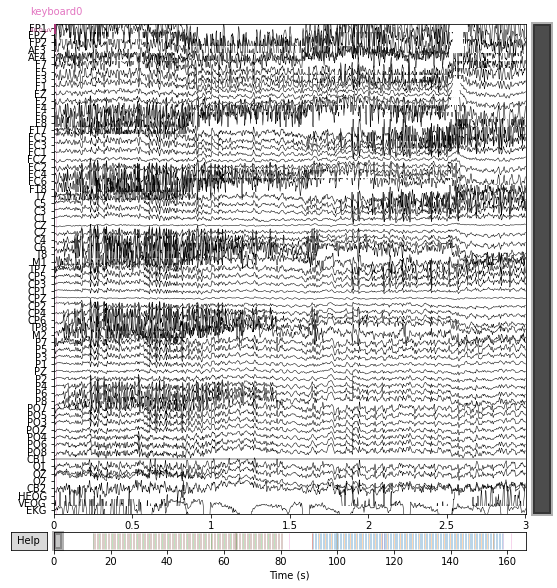

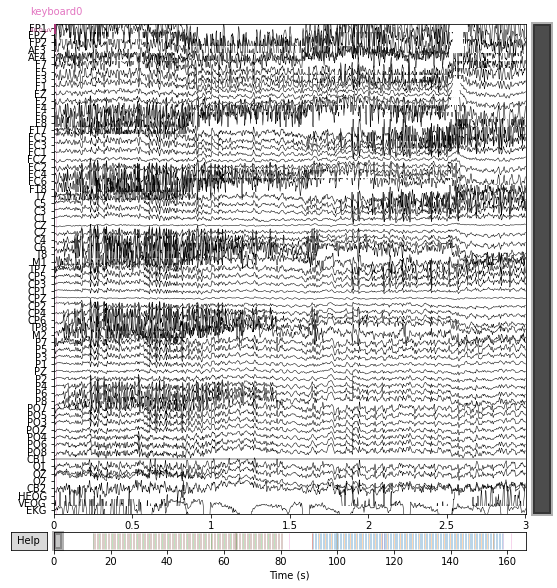

In [ ]:
#raw_.plot(duration=3, n_channels=67)

In [ ]:
def data_clean(file_path):
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
  raw_.set_eeg_reference()
  raw_.filter(l_freq=1,h_freq=45)
  reject_criteria = dict(eeg=100e-6)
  flat_criteria = dict(eeg=1e-6)
  if 'EKG' in raw_.info['ch_names']:
    ecg_events  = mne.preprocessing.find_ecg_events(raw_, event_id=999, ch_name='EKG', tstart=0.0, l_freq=5, h_freq=45, qrs_threshold='auto', filter_length='10s')
    onsets_ecg = ecg_events[0].T[0] / raw_.info['sfreq'] - 0.25
    durations_ecg = [0.5] * len(ecg_events[0])
    descriptions_ecg = ['bad heart'] * len(ecg_events[0])
    heart_annot = mne.Annotations(onsets_ecg, durations_ecg, descriptions_ecg)
    eog_events = mne.preprocessing.find_eog_events(raw_, ch_name=['HEOG','VEOG'])
    onsets_eog = eog_events[:, 0] / raw_.info['sfreq'] - 0.25
    durations_eog = [0.5] * len(eog_events)
    descriptions_eog = ['bad blink'] * len(eog_events)
    blink_annot = mne.Annotations(onsets_eog, durations_eog, descriptions_eog)
    raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)
    ev = mne.events_from_annotations(raw_, event_id='auto')
    ep = mne.Epochs(raw_, events = ev[0], event_id = ev[1], reject_tmax=0, reject=reject_criteria, flat=flat_criteria, event_repeated = 'drop', reject_by_annotation=True, preload = True)
    del(raw_)
    ep= ep.get_data() #epochs

  else:
    eog_events = mne.preprocessing.find_eog_events(raw_, ch_name=['HEOG','VEOG'])
    onsets_eog = eog_events[:, 0] / raw_.info['sfreq'] - 0.25
    durations_eog = [0.5] * len(eog_events)
    descriptions_eog = ['bad blink'] * len(eog_events)
    blink_annot = mne.Annotations(onsets_eog, durations_eog, descriptions_eog)
    raw_.set_annotations(raw_.annotations+blink_annot)
    ev = mne.events_from_annotations(raw_, event_id='auto')
    ep = mne.Epochs(raw_, events = ev[0], event_id = ev[1], reject_tmax=0, reject=reject_criteria, flat=flat_criteria, event_repeated = 'drop', reject_by_annotation=True, preload = True)
    del(raw_)
    ep = ep.get_data() #epochs
  return ep

In [ ]:
#len(ecg_events[0])

185

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


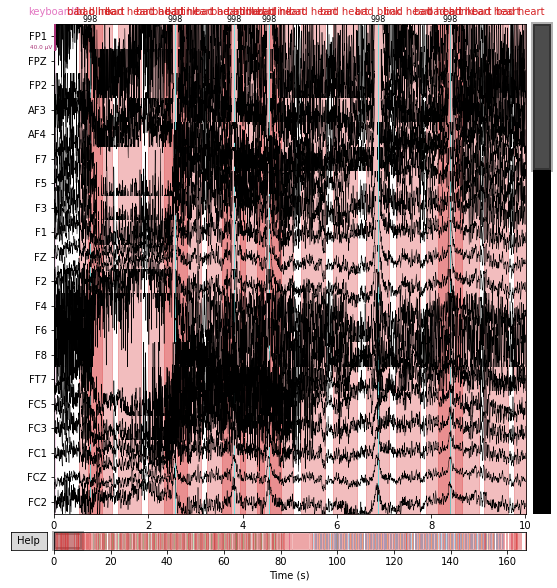

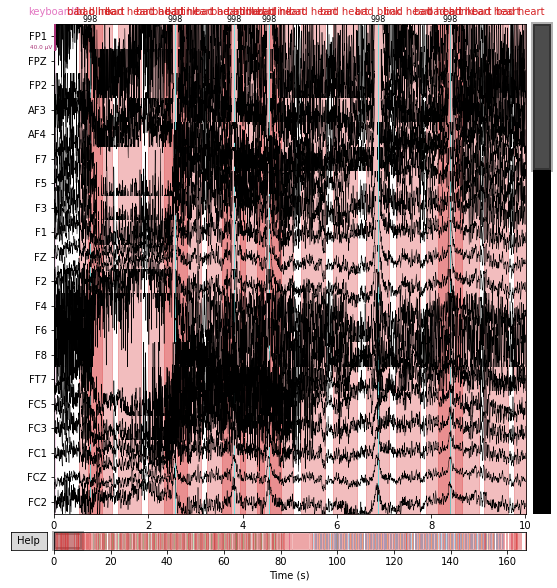

In [ ]:
#eeg_picks = mne.pick_types(raw_.info, meg=False, eeg=True)
#raw_.plot(events=eog_events, order=eeg_picks)

In [ ]:
#reject_criteria = dict(eeg=100e-6)
#flat_criteria = dict(eeg=1e-6)

In [ ]:
#from mne.viz import epochs
#ep = mne.Epochs(raw_, events = ev[0], event_id = ev[1], reject_tmax=0, reject=reject_criteria, flat=flat_criteria, event_repeated = 'drop', reject_by_annotation=True, preload = True)
#epo = ep.get_data()
#print(epo.shape)

Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'F6', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'F6', 'HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'F6', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'F6', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'F6', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'F6']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'F6', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F5', 'F6', 'FT8', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'F6', 'CB2', 'HEOG'

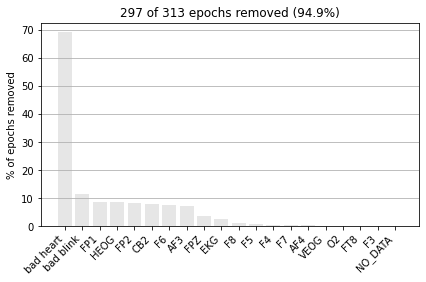

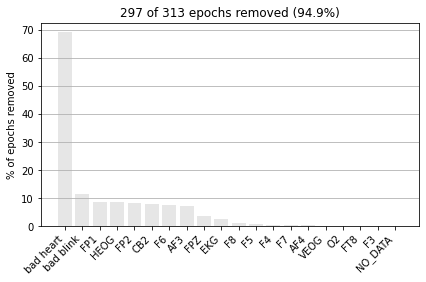

In [ ]:
#ep.plot_drop_log()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


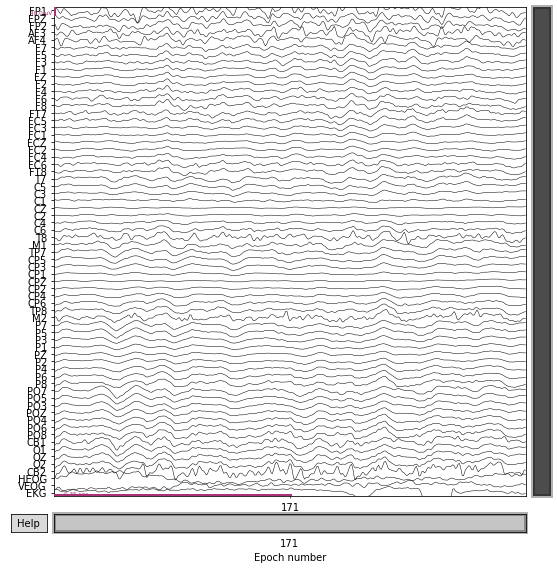

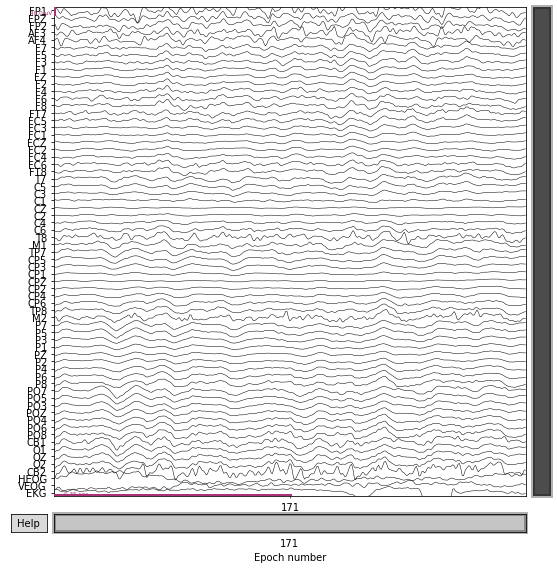

In [ ]:
#ep[0].plot(n_channels = 67)

    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-229-94ecc666fb69>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  ep.plot_psd()


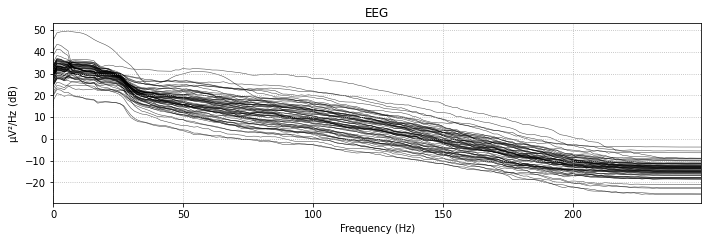

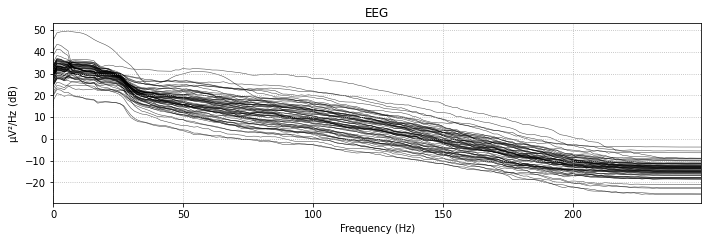

In [ ]:
#ep.plot_psd()

In [ ]:
#filtered = ep.filter(0.5, 45)   

Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)



<ipython-input-230-7ae01862b53a>:1: RuntimeWarning: filter_length (3301) is longer than the signal (351), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = ep.filter(0.5, 45)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1072 out of 1072 | elapsed:    0.5s finished


    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-231-d18e78463ba3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd()


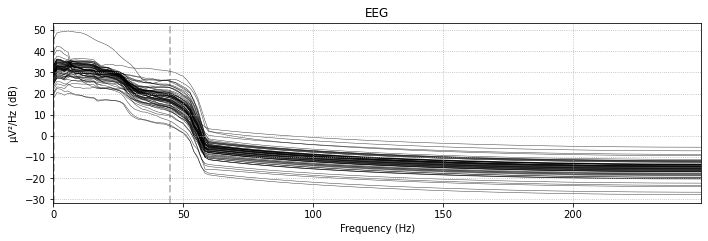

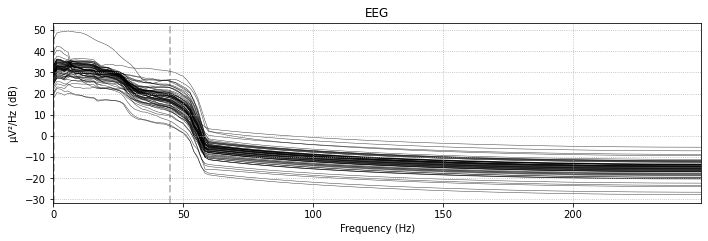

In [ ]:
#filtered.plot_psd()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


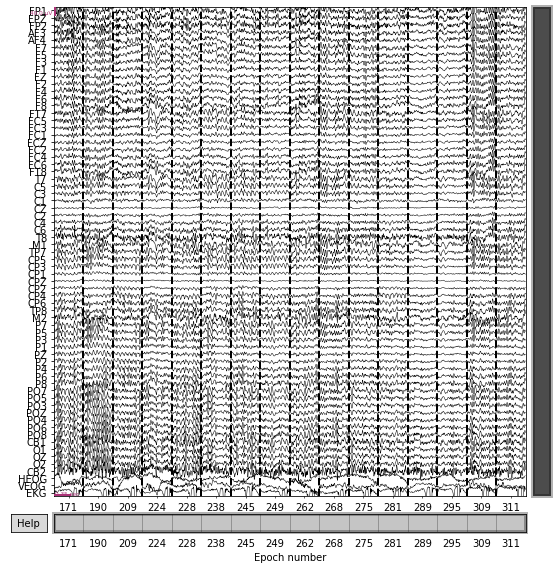

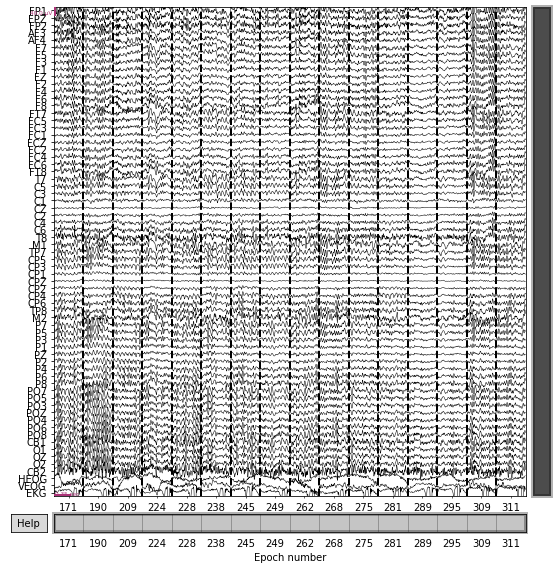

In [ ]:
#filtered.plot(n_channels=67)

In [ ]:
limit = 66
normal_epochs_array = []
for index, subject in enumerate(normal_file_path):
    normal_epochs_array.append(data_clean(subject))
    if index == limit:
        break

Reading /content/drive/MyDrive/dataset/normal/sub-001_task-Rest_run-01_eeg.fdt
Reading 0 ... 250733  =      0.000 ...   501.466 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
937 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 937 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'F6', 'T7', 'T8', 'TP7', 'P1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'T7', 'T8', 'M1', 'TP7', 'M2', 'P1', 'HEOG']
    Rejecting  epoch based on EEG : ['F6', 'T7', 'C6', 'T8', 'TP7', 'P1', 'OZ', 'HEOG']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['C6', 'T8', 'P1']
    Rejecting  epoch based on EEG : ['T8', 'P1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejectin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'T8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '13', '14', '17', '2', '3', '4', 'keyboard0']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
632 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 632 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['T8']
    Reject

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
933 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 933 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O1', 'CB2']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO8', 'CB1', 'O1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['O1', 'O2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG :

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'O1', 'CB2']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['M1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO8', 'CB1', 'O1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO3', 'POZ', 'CB1', 'O1']
    

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '17', '2', '3', '4', 'boundary', 'keyboard0']
Not setting metadata
622 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 622 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecti

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['P8', 'PO8']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
936 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 936 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO7', 'O1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO5', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO5']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'O1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['PO

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 6 significant peaks
Number of EOG events detected: 6
Used Annotations descriptions: ['1', '11', '12', '13', '14', '17', '2', '3', '4', 'boundary', 'keyboard0']
Not setting metadata
619 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 619 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['C1', 'CZ', 'C2', 'HEOG']
    Rejecting  epoch based on EEG : ['PO7', 'PO5']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'CB2']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['PO5', 'O1']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['O1', 'OZ']
    Rejecting  epoch based on EEG : ['PO8', 'O1', 'CB2']
    Rejectin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'PO7', 'PO5', 'PO3', 'O1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
940 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 940 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FPZ']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FT7', 'HEOG']
    Rejecting  epoch based on EEG : ['FT7']
    Rejecting  epoch based on EEG : ['FT7']
    Rejecting  epoch based on EEG : ['FT7'

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'CP3', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO7', 'CB1']
10 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-005_task-Rest_run-01_eeg.fdt
Reading 0 ... 244039  =      0.000 ...   488.078 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Set

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 520 (average pulse 63 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 96 significant peaks
Number of EOG events detected: 96
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
941 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 256 (average pulse 68 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 97 significant peaks
Number of EOG events detected: 97
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
311 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-006_task-Rest_run-01_eeg.fdt
Reading 0 ... 261759  =      0.000 ...   523.518 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 778 (average pulse 89 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 145 significant peaks
Number of EOG events detected: 145
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '175', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
940 matching events found
Se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-006_task-Rest_run-02_eeg.fdt
Reading 0 ... 84350  =      0.000 ...   168.700 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
321 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 321 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'F8', 'FT7', 'FT8', 'P1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
945 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 945 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejecting  epoch based on E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F8', 'PO8', 'O2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['PO8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP2', 'F7', 'F8', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'PO8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['FPZ', 'PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
325 matching events found


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 325 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PZ', 'PO8', 'CB1', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['PO7', 'VEOG']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO3', 'PO8', 'VEOG']
    Rejecting  epoch based on EEG : ['P8', 'PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejectin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 714 (average pulse 86 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 99 significant peaks
Number of EOG events detected: 99
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
945 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-008_task-Rest_run-02_eeg.fdt
Reading 0 ... 81979  =      0.000 ...   163.958 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 237 (average pulse 86 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 45 significant peaks
Number of EOG events detected: 45
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/normal/sub-009_task-Rest_run-01_eeg.fdt
Reading 0 ... 249933  =      0.000 ...   499.866 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
935 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 935 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FC6', 'FT8', 'T8']
    Rejecting  epoch based on EEG : ['FT7', 'FC6', 'FT8', 'C5', 'C6', 'T8']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 14 significant peaks
Number of EOG events detected: 14
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Not setting metadata
317 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 317 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F6', 'F8', 'FC4', 'FC6', 'FT8', 'C4', 'C6', 'T8', 'CP6']
    Rejecting  epoch based on EEG : ['F6', 'FT7', 'FC3', 'FC6', 'FT8', 'C5', 'C6', 'CB2']
    Rejecting  epoch based on EEG : ['F6', 'FC6', 'FT8', 'CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FC3', 'FC4', 'FC6', 'FT8', 'C6', 'T8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
942 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 942 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO6']
    Rejecting  epoch based on EEG : ['FP1', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejectin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'OZ', 'O2']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO5', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 510 (average pulse 58 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 125 significant peaks
Number of EOG events detected: 125
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
943 matching events found
Setting b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
709 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-011_task-Rest_run-02_eeg.fdt
Reading 0 ... 85770  =      0.000 ...   171.540 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 c

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 6 significant peaks
Number of EOG events detected: 6
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
320 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'F4', 'C4', 'PO8', 'CB1', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F6', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'F6', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    R

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 596 (average pulse 68 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
934 matching events found
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG', 'VEOG']
    Rejectin

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 184 (average pulse 66 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 44 significant peaks
Number of EOG events detected: 44
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/normal/sub-013_task-Rest_run-01_eeg.fdt
Reading 0 ... 267039  =      0.000 ...   534.078 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 671 (average pulse 75 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 71 significant peaks
Number of EOG events detected: 71
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
954 matching events found
Sett

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


827 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-013_task-Rest_run-02_eeg.fdt
Reading 0 ... 88919  =      0.000 ...   177.838 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 182 (average pulse 61 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 44 significant peaks
Number of EOG events detected: 44
Used Annotations descriptions: ['1', '11', '12', '17', '2', '255', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
App

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-014_task-Rest_run-01_eeg.fdt
Reading 0 ... 250699  =      0.000 ...   501.398 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 585 (average pulse 70 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 97 significant peaks
Number of EOG events detected: 97
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
929 matching events found

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['CB1', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EK

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['M1', 'P8']
    Rejecting  epoch based on EEG : ['M1', 'P8', 'CB1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'M1', 'CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1', 'CB1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1', 'CB1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1', 'CB1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1', 'HEOG']
    Rejecting  epoch based on

<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
935 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 935 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['F7', 'FT7', 'FC5', 'FC3', 'T7', 'C3']
    Rejecting  epoch based on EEG : ['F7', 'FT7', 'FC5', 'FC3', 'T7', 'C3']
    Rejecting  epoch based on EEG : ['PO8', 'O1']
    Rejecting  epoch based on EEG : ['P8', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['P8', 'PO8', 'O1', 'OZ', 'CB2']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['P8', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['P8', 'PO8', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO8', 'O1']
    Rejecting  epoch based on EEG : ['P8', 'PO8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'O1']
    Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 181 (average pulse 63 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 21 significant peaks
Number of EOG events detected: 21
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0', 'keypad1']
Not setting metadata
320 matching events found
Setting baseline interval to [-0.2, 0.0] sec

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-016_task-Rest_run-01_eeg.fdt
Reading 0 ... 214519  =      0.000 ...   429.038 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 560 (average pulse 78 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 79 significant peaks
Number of EOG events detected: 79
Used Annotations descriptions: ['1', '11', '13', '14', '15', '16', '17', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
778 matching events found
Setting ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
734 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-016_task-Rest_run-02_eeg.fdt
Reading 0 ... 83199  =      0.000 ...   166.398 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 185 (average pulse 66 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


286 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-017_task-Rest_run-01_eeg.fdt
Reading 0 ... 249959  =      0.000 ...   499.918 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 643 (average pulse 77 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 106 significant peaks
Number of EOG events detected: 106
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
932 matching events fou

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB2']
890 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-017_task-Rest_run-02_eeg.fdt
Reading 0 ... 85899  =      0.000 ...   171.798 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 214 (average pulse 74 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 42 significant peaks
Number of EOG events detected: 42
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-018_task-Rest_run-01_eeg.fdt
Reading 0 ... 250779  =      0.000 ...   501.558 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 817 (average pulse 97 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 101 significant peaks
Number of EOG events detected: 101
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
928 matching events found
Se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/normal/sub-018_task-Rest_run-02_eeg.fdt
Reading 0 ... 108279  =      0.000 ...   216.558 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 344 (average pulse 95 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 60 significant peaks
Number of EOG events detected: 60
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/normal/sub-019_task-Rest_run-01_eeg.fdt
Reading 0 ... 246933  =      0.000 ...   493.866 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
928 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 928 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'OZ', 'O2', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'PO8', 'HEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['PO5', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['FP2', 'P7', 'PZ', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['PZ', 'P6', 'P8', 'PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P6', 'P8', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['P7', 'P5', 'PO7', 'PO5', 'PO3', 'PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'P3', 'P1', 'PZ', 'P2', 'P8', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'PO6', 'HEOG']
    Rejecting  epoch based on EEG : ['PO8', 'HEOG']
    Rejecting  epoch based on EEG : ['P8', 'PO5', 'PO3', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['FP2', 'P6', 'P8', 'PO4', 'PO6', 'PO8']
    Reje

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 314 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['TP8', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['P8', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P8', 'PO7', 'PO5', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['P3', 'PO5', 'PO3']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO6']
    Rejecting  epoch based on EEG : ['P5', 'PO5']
    Rejecting  epoch based on EEG : ['FP2', 'PO8', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'HEOG']
    Rejecting  epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 6 significant peaks
Number of EOG events detected: 6
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
933 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 933 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['VEOG']
    R

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 11 significant peaks
Number of EOG events detected: 11
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
899 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 899 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 312 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO3', 'O1']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 6 significant peaks
Number of EOG events detected: 6
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
938 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 938 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'F7', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['T8', 'CP5']
    Rejecting  epoch based on EEG : ['FC5', 'T8', 'CP5']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P3', 'P1', 'P4', 'P6', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'F7', 'F5', 'F3', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'C4', 'T8', 'TP7', 'CP5', 'CP3', 'CP6', 'TP8', 'P7', 'P6', 'HEOG', 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 312 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEO

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 510 (average pulse 59 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 119 significant peaks
Number of EOG events detected: 119
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
933 matching events fou

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['PZ', 'OZ', 'EKG']
    Rejecting  epoch based on EEG : ['OZ', 'CB2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F8', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 314 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['C2', 'CB1', 'OZ', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FPZ']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['FT8', 'T8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'F6', 'F8', 'FC6', 'C6', 'T8', 'HEOG']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 528 (average pulse 68 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 42 significant peaks
Number of EOG events detected: 42
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
847 matching events found
Setting base

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
699 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-024_task-Rest_run-02_eeg.fdt
Reading 0 ... 82610  =      0.000 ...   165.220 secs...
EEG channel type selected for re-referencing
Apply

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
316 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 316 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5', 'FC3']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
12 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-025_task-Rest_run-01_eeg.fdt
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 63 significant peaks
Number of EOG events detected: 63
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6']
Not setting metadata
915 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 915 events and 351 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['HEOG']
37 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-025_task-Rest_run-02_eeg.fdt
Reading 0 ... 84270  =      0.000 ...   168.540 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
317 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 317 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'AF3', 'F7', 'F5', 'C2', 'CPZ', 'CP2', 'P1', 'PO3', 'POZ', 'O1', 'OZ', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Re

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 578 (average pulse 70 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 638 significant peaks
Number of EOG events detected: 638
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
930 matching events fou

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5', 'PO6', 'PO8', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO8', 'VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VE

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 206 (average pulse 74 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 65 significant peaks
Number of EOG events detected: 65
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO3', 'PO8', 'VEOG']
314 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-027_task-Rest_run-01_eeg.fdt
Reading 0 ... 245853  =      0.000 ...   491.706 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
944 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 944 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch b

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
320 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'F8', 'FT8', 'T7', 'TP7', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO6']
    Rejecting  epoch based on EEG : ['HEOG']
    Rej

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
947 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 947 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FPZ', 'M1', 'CB1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['FC6', 'C6', 'CP6']
    Rejecting  epoch based on EEG : ['FC5', 'FC3', 'C5', 'C3', 'VEOG']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FC3', 'T7', 'C5', 'C3', 'C6', 'M1', 'TP7', 'CP5', 'M2', 'P7', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['C4', 'C6', 'T8', 'CP6', 'TP8']
    Rejecting  epoch based on EEG : ['C6']
    Rejecting  epoch based o

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 314 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['C6', 'T8', 'CP6']
    Rejecting  epoch based on EEG : ['C4', 'C6', 'T8', 'CP6']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['C6', 'M1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F8', 'FC6', 'FT8', 'C6']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['T7', 'CP5']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.7s finished


Number of ECG events detected : 173 (average pulse 20 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
897 matching events found
S

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 211 (average pulse 77 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 276 significant peaks
Number of EOG events detected: 276
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/normal/sub-030_task-Rest_run-01_eeg.fdt
Reading 0 ... 225519  =      0.000 ...   451.038 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 507 (average pulse 67 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 79 significant peaks
Number of EOG events detected: 79
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
898 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
736 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-030_task-Rest_run-02_eeg.fdt
Reading 0 ... 77439  =      0.000 ...   154.878 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 182 (average pulse 70 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 27 significant peaks
Number of EOG events detected: 27
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/normal/sub-031_task-Rest_run-01_eeg.fdt
Reading 0 ... 246779  =      0.000 ...   493.558 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 478 (average pulse 58 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 162 significant peaks
Number of EOG events detected: 162
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
934 matching events fou

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 147 (average pulse 53 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 50 significant peaks
Number of EOG events detected: 50
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] se

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG', 'EK

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 23 significant peaks
Number of EOG events detected: 23
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
942 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 942 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FC3', 'T7', 'C4', 'T8', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'F7', 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Found 39 significant peaks
Number of EOG events detected: 39
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary']
Not setting metadata
307 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 307 events and 351 original time points ...
34 bad epochs dropped
Reading /content/drive/MyDrive/dataset/normal/sub-033_task-Rest_run-01_eeg.fdt
Reading 0 ... 169000  =      0.000 ...   338.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transi

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 14 significant peaks
Number of EOG events detected: 14
Used Annotations descriptions: ['13', '14', '15', '16', '17', '255', '3', '4', '5', '6', 'boundary']
Not setting metadata
576 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 576 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Reject

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Found 6 significant peaks
Number of EOG events detected: 6
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary']
Not setting metadata
307 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 307 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CP2', 'M2', 'P4', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  e

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
852 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 852 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejec

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'HEOG']
    Rejecting  epoch based o

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F8', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FC1', 'M2']
    Rejecting  epoch based on EEG : ['FC1', 'M2']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2

In [ ]:
depress_file_path = mild_file_path + moderate_file_path + severe_file_path

In [ ]:
len(normal_epochs_array)

60

In [ ]:
#normal_epochs_array=[data_clean(subject) for subject in normal_file_path]
depress_epochs_array=[data_clean(subject) for subject in depress_file_path]
#mild_epochs_array=[data_clean(subject) for subject in mild_file_path]
#moderate_epochs_array=[data_clean(subject) for subject in moderate_file_path]
#severe_epochs_array=[data_clean(subject) for subject in severe_file_path]

Reading /content/drive/MyDrive/dataset/mild/sub-060_task-Rest_run-01_eeg.fdt
Reading 0 ... 248259  =      0.000 ...   496.518 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 715 (average pulse 86 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 212 significant peaks
Number of EOG events detected: 212
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
915 matching events found
Setting ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/mild/sub-060_task-Rest_run-02_eeg.fdt
Reading 0 ... 84711  =      0.000 ...   169.422 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
316 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Usi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['CB1', 'O1', 'OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['O1', 'OZ', 'O2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
   

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 658 (average pulse 78 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
914 matching events found
Setting baseli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


874 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-066_task-Rest_run-02_eeg.fdt
Reading 0 ... 118994  =      0.000 ...   237.988 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Not setting metadata
308 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 308 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'T7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'VEOG']
    Rejecting  epoch ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 610 (average pulse 74 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 132 significant peaks
Number of EOG events detected: 132
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
918 matching events found
Setting b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
851 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-088_task-Rest_run-02_eeg.fdt
Reading 0 ... 123424  =      0.000 ...   246.848 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filte

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 276 (average pulse 67 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Used Annotations descriptions: ['1', '11', '12', '17', '2', '255', 'keyboard0']
Not setting metadata
317 matching events found
Setting baseline interval to [-0.2, 0.0] sec
App

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
266 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-092_task-Rest_run-01_eeg.fdt
Reading 0 ... 227179  =      0.000 ...   454.358 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 53 significant peaks
Number of EOG events detected: 53
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
873 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 873 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FPZ']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
57 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-092_task-Rest_run-02_eeg.fdt
Reading 0 ... 79679  =      0.000 ...   159.358 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 30 significant peaks
Number of EOG events detected: 30
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
36 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-104_task-Rest_run-01_eeg.fdt
Reading 0 ... 245919  =      0.000 ...   491.838 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 84 significant peaks
Number of EOG events detected: 84
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'OZ', 'O2', 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'O1', 'OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O1', 'OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1',

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 23 significant peaks
Number of EOG events detected: 23
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
241 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 241 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['OZ', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['CB1', 'OZ', 'O2', 'CB2']
    Rejecting  ep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 93 significant peaks
Number of EOG events detected: 93
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6']
    Rejecting  epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 55 significant peaks
Number of EOG events detected: 55
Used Annotations descriptions: ['1', '11', '12', '17', '2']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F3']
    Reject

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 584 (average pulse 70 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 77 significant peaks
Number of EOG events detected: 77
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
919 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'F5', 'F4', 'EKG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'F5', 'HEOG']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG :

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


318 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 318 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['M2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'FZ', 'F4', 'FT7', 'FC4', 'C1', 'CZ', 'CP2', 'M2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FC4']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['T7', 'VEOG']
    Rejecting  epoch based on EEG : ['T7', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'AF4', 'F6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 151 significant peaks
Number of EOG events detected: 151
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['T7', 'TP8', 'M2', 'P7', 'P8', 'CB1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FT8']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'AF4']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'AF4']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'AF4']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2', 'CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 55 significant peaks
Number of EOG events detected: 55
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FT8', 'C6', 'T8']
    Rejecting  epoch based on EEG : ['FT8', 'C6']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1']
46 bad epochs dropped
Reading /content/drive/MyDrive/dataset

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 895 (average pulse 117 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 131 significant peaks
Number of EOG events detected: 131
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
862 matching events found
Setting baseline inte

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/mild/sub-111_task-Rest_run-02_eeg.fdt
Reading 0 ... 121159  =      0.000 ...   242.318 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 101 significant peaks
Number of EOG events detected: 101


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FT8', 'T8']
    Rejecting  epoch based on EEG : ['FC5', 'FC3']
    Rejecting  epoch based on EEG : ['FT8', 'C6', 'T8']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FC3', 'T7', 'C5', 'CP5']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FC3', 'T7', 'T8', 'CP5']
    Rejecting  epoch based on EEG : ['FT7', 'T7', 'CP5']
74 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 141 significant peaks
Number of EOG events detected: 141
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejec

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'F6', 'F8', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 70 significant peaks
Number of EOG events detected: 70
Used Annotations descriptions: ['1', '11', '12', '17', '2', '255']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Not setting metadata
307 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 307 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP2', 'F7', 'FT7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'M1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 181 significant peaks
Number of EOG events detected: 181
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['PO8', 'CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 50 significant peaks
Number of EOG events detected: 50


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', '255']
Not setting metadata
307 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 307 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB1', 'O1']
    Rejecting  epoch based on EEG : ['CB1', 'O1']
    Rejecting  epoch based on EEG : ['AF4', 'F6']
    Rejecting  epoch based on EEG : ['HEOG']
39 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-117_task-Rest_run-01_eeg.fdt
Reading 0 ... 269034  =      0.000 ...   538.068 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
916 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 916 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1',

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'F7', 'F6', 'F8', 'M1', 'HEOG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 230 (average pulse 80 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 38 significant peaks
Number of EOG events detected: 38
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/mild/sub-119_task-Rest_run-01_eeg.fdt
Reading 0 ... 251899  =      0.000 ...   503.798 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 127 significant peaks
Number of EOG events detected: 127
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['TP7']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['TP7', 'P7']
    Rejecting  epoch based on EEG : ['HEOG']
92 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-119_task-Rest_run-02_eeg.fdt
Reading 0 ... 79619  =      0.000 ...   159.238 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower tran

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 35 significant peaks
Number of EOG events detected: 35
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP2', 'VEOG']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
39 bad epochs dropped
Reading /content/drive/MyDrive/dataset/mild/sub-120_task-Rest_run-01_eeg.fdt
Reading 0 ... 250159  =      0.000 ...   500.318 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 735 (average pulse 88 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 122 significant peaks
Number of EOG events detected: 122
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline inter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/mild/sub-120_task-Rest_run-02_eeg.fdt
Reading 0 ... 82779  =      0.000 ...   165.558 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 311 (average pulse 112 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 42 significant peaks
Number of EOG events detected: 42
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/mild/sub-122_task-Rest_run-01_eeg.fdt
Reading 0 ... 290019  =      0.000 ...   580.038 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 66 (average pulse 6 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
885 matching events found
Setting baseli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    R

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 317 (average pulse 116 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 69 significant peaks
Number of EOG events detected: 69
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-053_task-Rest_run-01_eeg.fdt
Reading 0 ... 245079  =      0.000 ...   490.158 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 558 (average pulse 68 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 159 significant peaks
Number of EOG events detected: 159
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
929 matching events found
Setting b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['EKG']
812 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-053_task-Rest_run-02_eeg.fdt
Reading 0 ... 85519  =      0.000 ...   171.038 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transiti

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 206 (average pulse 72 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-055_task-Rest_run-01_eeg.fdt
Reading 0 ... 249154  =      0.000 ...   498.308 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 679 (average pulse 81 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
925 matching events found
Setting basel

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-055_task-Rest_run-02_eeg.fdt
Reading 0 ... 88595  =      0.000 ...   177.190 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 216 (average pulse 73 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
314 matching events found
Setting baseline interval to [-0.2, 0.0] sec


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-058_task-Rest_run-01_eeg.fdt
Reading 0 ... 249179  =      0.000 ...   498.358 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 597 (average pulse 71 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 60 significant peaks
Number of EOG events detected: 60
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
923 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
807 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-058_task-Rest_run-02_eeg.fdt
Reading 0 ... 108259  =      0.000 ...   216.518 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 258 (average pulse 71 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 72 significant peaks
Number of EOG events detected: 72
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
308 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-059_task-Rest_run-01_eeg.fdt
Reading 0 ... 248139  =      0.000 ...   496.278 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 680 (average pulse 82 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 57 significant peaks
Number of EOG events detected: 57
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
915 matching events found
Setting bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2', 'EKG']
    Rejecting  epoch based on EEG : ['P4', 'P6', 'P8', 'PO4', 'PO6', 'PO8', 'O2', 'EKG']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
870 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-059_task-Rest_run-02_eeg.fdt
Reading 0 ... 110270  =      0.000 ...   220.540 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 290 (average pulse 78 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 2 significant peaks
Number of EOG events detected: 2
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
305 matching events found
Setting baseline interval to [-0.2, 0.0] sec


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-061_task-Rest_run-01_eeg.fdt
Reading 0 ... 241939  =      0.000 ...   483.878 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 547 (average pulse 67 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 31 significant peaks
Number of EOG events detected: 31
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interva

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3']
    Rejecting  epoch based on EEG : ['PO8', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['PO5', 'O1']
    Rejecting  epoch based on EEG : ['VEOG']
748 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-061_task-Rest_run-02_eeg.fdt
Reading 0 ... 109839  =      0.000 ...   219.678 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 247 (average pulse 67 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 52 significant peaks
Number of EOG events detected: 52
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
310 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-063_task-Rest_run-01_eeg.fdt
Reading 0 ... 249374  =      0.000 ...   498.748 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 13 (average pulse 1 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
920 matching events found
Set

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2', 'EKG']
    Rejecting  epoch based on EEG : ['CB2']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 312 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'AF3', 'F6', 'F8', 'FC5', 'FC2', 'FC6', 'T7', 'CP5', 'CP6', 'TP8', 'P4', 'P8', 'PO3', 'PO8', 'O1', 'OZ', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['CB1', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO7', 'CB2']
    Rejecting  epoch based on EEG : ['PO7', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
 

<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)
<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 591 (average pulse 71 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 27 significant peaks
Number of EOG events detected: 27
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
915 matching events found
Setting base

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
784 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-065_task-Rest_run-02_eeg.fdt
Reading 0 ... 84231  =      0.000 ...   168.462 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
309 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 309 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'FC2', 'CZ', 'C2', 'PO7', 'CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'FC5', 'FC3', 'FC6', 'FT8', 'C6', 'T8', 'CP6', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['F4', 'F6', 'F8', 'FC4', 'FC6', 'FT8', 'C4', 'C6', 'T8', 'TP8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F6', 'F8', 'FC6', 'FT8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG 

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 433 (average pulse 56 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary', 'keyboard0']
Not setting metadata
912 matching events found
S

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP4', 'CP6', 'TP8', 'M2', 'P5', 'P6', 'VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EE

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
321 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 321 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F8', 'M1', 'TP8', 'M2', 'P8', 'CB1', 'CB2', 'VEOG']
    Rejecting  epoch based on EEG : ['FC6', 'T8', 'M2', 'CB2']
    Rejecting  epoch based on EEG : ['M2', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['FC6', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CP4', 'CP6', 'TP8', 'M2', 'P5', 'CB1', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'CB2', 'VEOG']
   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 613 (average pulse 73 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 43 significant peaks
Number of EOG events detected: 43
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interva

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 271 (average pulse 69 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 67 significant peaks
Number of EOG events detected: 67
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
308 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


246 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-086_task-Rest_run-01_eeg.fdt
Reading 0 ... 251039  =      0.000 ...   502.078 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 765 (average pulse 91 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 102 significant peaks
Number of EOG events detected: 102
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline inter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-086_task-Rest_run-02_eeg.fdt
Reading 0 ... 111911  =      0.000 ...   223.822 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', '255', 'keyboard0']
Not setting metadata
313 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 313 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP6', 'TP8', 'M2', 'P6', 'P8', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FT7', 'FT8']
    Rejecting  epoch based on EEG : ['F4', 'F6', 'F8', 'FC6', 'FT8', 'C6', 'T8', 'VEOG']
    Rejecting  epoch based on EEG : ['T7', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC4', 'FC6', 'FT8', 'T8', 'M1', 'M2', 'CB1', 'HEOG', 'VEOG'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 761 (average pulse 92 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 124 significant peaks
Number of EOG events detected: 124
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
918 matching events found
Setting b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-089_task-Rest_run-02_eeg.fdt
Reading 0 ... 83239  =      0.000 ...   166.478 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 209 (average pulse 75 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 47 significant peaks
Number of EOG events detected: 47
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
304 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-096_task-Rest_run-01_eeg.fdt
Reading 0 ... 244759  =      0.000 ...   489.518 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 850 (average pulse 104 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 95 significant peaks
Number of EOG events detected: 95
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
919 matching events found
Setting ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-096_task-Rest_run-02_eeg.fdt
Reading 0 ... 73059  =      0.000 ...   146.118 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 176 (average pulse 72 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 13 significant peaks
Number of EOG events detected: 13
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary']
Not setting metadata
276 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-097_task-Rest_run-01_eeg.fdt
Reading 0 ... 253519  =      0.000 ...   507.038 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 34 significant peaks
Number of EOG events detected: 34
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6']
Not setting metadata
916 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 916 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on EEG : ['POZ', 'PO4']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P4', 'P6', 'P8', 'PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PZ', 'P2']
    Rejecting  epoch based on EEG : ['P6', 'P8']
    Rejecting  epoch based on EEG : ['P2', 'P4', 'P6']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on EEG : ['PO5', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'POZ', 'O1']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['P2', 'P8']
    Rejecting  epoch based on EEG : ['P2', 'P4']
    Rejecting  epoch based on EEG : ['PZ', 'P2']
    Rejecting  epoch based on EEG : ['FP2']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['POZ']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 320 (average pulse 82 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 23 significant peaks
Number of EOG events detected: 23
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-098_task-Rest_run-01_eeg.fdt
Reading 0 ... 248754  =      0.000 ...   497.508 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 7 significant peaks
Number of EOG events detected: 7
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
918 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 918 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB1', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : [

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Found 75 significant peaks
Number of EOG events detected: 75
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'FT7', 'FC4', 'FC6', 'FT8', 'C5', 'C4', 'C6', 'T8', 'M1', 'CP6', 'TP8', 'M2']
    Rejecting  epoch based on EEG : ['F7', 'F6', 'F8', 'FT7', 'FC5', 'FC4', 'FC6', 'FT8', 'C5', 'C4', 'C6', 'TP7', 'CP6', 'M2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 548 (average pulse 65 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 47 significant peaks
Number of EOG events detected: 47
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '240', '3', '4', '5', '6']
Not setting metadata
915 matching events found
Setting baseline 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO7', 'PO8', 'HEOG']
    Rejecting  epoch based on EEG : ['PO7', 'PO8', 'CB1']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['PO7']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['TP7', 'CP5', 'P7', 'P5', 'PO7', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'EKG']
    Rejecting  epoch based on EEG : ['AF4', 'EKG']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO7']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'CPZ']
739 bad epochs dropped
Reading /content/drive/MyDrive/dataset/modera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 45 significant peaks
Number of EOG events detected: 45
Used Annotations descriptions: ['1', '11', '12', '17', '2']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO7', 'O1']
    Rejecting  epoch based on EEG : ['PO7']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO7']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO7', 'CB1', 'O1']
   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 15 significant peaks
Number of EOG events detected: 15
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
913 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['AF3']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['FP1', 'AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'AF3']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'AF3']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'AF3']
    Rejecting  epoch based on EEG : ['FP1', 'AF3']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'FT7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'VEOG']
    Rejecting  epoch based on EEG : ['

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 58 significant peaks
Number of EOG events detected: 58


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
304 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 304 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['CB2']
7 bad epochs dropped
Reading /content/drive/MyDrive/dataset/moderate/sub-101_task-Rest_run-01_eeg.fdt
Reading 0 ... 244779  =      0.000 ...   489.558 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming win

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 719 (average pulse 88 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 13 significant peaks
Number of EOG events detected: 13
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
884 matching events found
Setting base

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-101_task-Rest_run-02_eeg.fdt
Reading 0 ... 107499  =      0.000 ...   214.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 76 significant peaks
Number of EOG events detected: 76


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F8', 'FT7', 'FC5', 'FC6', 'FT8', 'T7', 'C5', 'C4', 'C6', 'T8', 'TP7', 'CP6']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F6', 'F8', 'FT7', 'FC5', 'FC6', 'FT8', 'T7', 'C5', 'C4', 'C6', 'T8', 'TP7', 'CP6']
    Rejecting  epoch based on EEG : ['F7', 'F6', 'F8', 'FT7', 'FC5', 'FC6', 'FT8', 'C5', 'C4', 'C6', 'T8', 'CP6']
    Rejecting  epoch based on EEG : ['FT7']
    Rejecting  epoch based on EEG : ['FT8', 'C6']
    Rejecting  epoch based on EEG : ['C6']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['O2', 'CB2']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 722 (average pulse 87 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 115 significant peaks
Number of EOG events detected: 115
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
912 matching events found
Setting baseline inter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-102_task-Rest_run-02_eeg.fdt
Reading 0 ... 106939  =      0.000 ...   213.878 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 302 (average pulse 84 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 16 significant peaks
Number of EOG events detected: 16
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
305 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


Reading /content/drive/MyDrive/dataset/moderate/sub-103_task-Rest_run-01_eeg.fdt
Reading 0 ... 252859  =      0.000 ...   505.718 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 65 significant peaks
Number of EOG events detected: 65
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['VEOG']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['PO8', 'CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FP2', 'F7', 'F8', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 61 significant peaks


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 61
Used Annotations descriptions: ['1', '11', '12', '17', '2', '255']
Not setting metadata
307 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 307 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.7s finished


Number of ECG events detected : 37 (average pulse 4 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 155 significant peaks
Number of EOG events detected: 155
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interva

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 236 (average pulse 67 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 81 significant peaks
Number of EOG events detected: 81
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-107_task-Rest_run-01_eeg.fdt
Reading 0 ... 116691  =      0.000 ...   233.382 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Not setting metadata
316 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 316 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F2', 'F4', 'FC2', 'FC4', 'FC6']
    Rejecting  epoch based on EEG : ['T8', 'VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'FC2', 'T8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F5', 'FC3', 'CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['F3', 'FC2', 'FC4', 'FC6']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
316 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 316 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F2', 'F4', 'FC2', 'FC4', 'FC6']
    Rejecting  epoch based on EEG : ['T8', 'VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'FC2', 'T8']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F5', 'FC3', 'CB1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['F3', 'FC2', 'FC4', 'FC6']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch base

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.7s finished


Number of ECG events detected : 525 (average pulse 63 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 164 significant peaks
Number of EOG events detected: 164
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline inter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 130 significant peaks
Number of EOG events detected: 130


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
310 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 310 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO5']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FT7']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['F8', 'FT7', 'FC5', 'FC6', 'FT8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FC6']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C6', 'M

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 524 (average pulse 61 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 26 significant peaks
Number of EOG events detected: 26
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '255', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
924 matching events found
Sett

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 218 (average pulse 61 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 61 significant peaks
Number of EOG events detected: 61
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
310 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-114_task-Rest_run-01_eeg.fdt
Reading 0 ... 246459  =      0.000 ...   492.918 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 614 (average pulse 74 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 92 significant peaks
Number of EOG events detected: 92
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interva

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG', 'EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 52 significant peaks
Number of EOG events detected: 52


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['F5', 'FT7', 'FC6', 'C6', 'CP6', 'TP8']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F6', 'FT7', 'FC3', 'FC4', 'FC6', 'FT8', 'C5', 'C3', 'C4', 'C6', 'T8', 'M1', 'CP6', 'TP8', 'M2', 'VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC4', 'FC6', 'FT8', 'C5', 'C3', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP6', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.6s finished


Number of ECG events detected : 929 (average pulse 117 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 63 significant peaks
Number of EOG events detected: 63
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Reading /content/drive/MyDrive/dataset/moderate/sub-118_task-Rest_run-02_eeg.fdt
Reading 0 ... 81099  =      0.000 ...   162.198 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 21 significant peaks
Number of EOG events detected: 21


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 306 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1', 'CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['CB2']
    Reject

<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['PO7', 'PO5']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO7', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P7', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5']
    Rejecting  epoch based on EEG : ['P7', 'PO7']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO7', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['P7', 'PO7', 'PO5']
    Rejecting  epoch bas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.5s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
856 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 856 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'AF4', 'F8', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch bas

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished


Now detecting blinks and generating corresponding events
Found 5 significant peaks
Number of EOG events detected: 5
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'boundary', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 312 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F3', 'F1', 'F2', 'FC1', 'C1', 'CP3', 'P3', 'P1', 'PO3', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['FP1']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'CP3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'AF3', 'CP3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'CP3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'CP3', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.5s finished


Number of ECG events detected : 603 (average pulse 73 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 130 significant peaks
Number of EOG events detected: 130
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
917 matching events found
Setting b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:18: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot+heart_annot)


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.3s finished


Number of ECG events detected : 227 (average pulse 66 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 81 significant peaks
Number of EOG events detected: 81
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
308 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
    Rejecting  epoch based on EEG : ['EKG']
276 bad epochs dropped
Reading /content/drive/MyDrive/dataset/severe/sub-085_task-Rest_run-01_eeg.fdt
Reading 0 ... 250734  =      0.000 ...   501.468 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'keyboard0']
Not setting metadata
924 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 924 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F6', 'F8', 'FT7', 'FC5', 'FT8', 'T7', 'C6', 'T8', 'CP6', 'VEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F6', 'F8', 'FT7', 'FC5', 'FT8', 'C6', 'T8', 'CP6', 'VEOG']
    Rejecting  epoch based on EEG : ['F8', 'FT8', 'CB1']
    Rejecting  epoch based on EEG : ['AF3', 'F7']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'CB1', 'CB2', 'HEOG']
    Rejecting  epoch based on EEG : ['FT8', 'C6', 'T8']
    Rejecting  epoch based on EEG : ['C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)


    Rejecting  epoch based on EEG : ['CB1']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'C5']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['PO7', 'PO5']
    Rejecting  epoch based on EEG : ['PO6', 'PO8', 'O2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8', 'O2', 'CB2']
    Rejecting  epoch based on EEG : ['PO7']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO7', 'PO5', 'PO3']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO4', 'PO6', 'PO8']
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['PO6', 'PO8']
    Rejecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Found 13 significant peaks
Number of EOG events detected: 13
Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
312 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 312 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'F6', 'F8', 'FT7', 'FC5', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP6', 'M2', 'CB1', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'M2', 'CB1', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['FT7', 'FC5', 'FT8', 'T7', 'C5', 'C6', 'T8', 'CP6', 'PO6', 'PO8', 'O2', 'CB2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP2', 'AF3', 'F8', 'FC5', 'C5', 'C6', 'T8', 'CP6', 'PO6', 'PO8', 'CB1'

<ipython-input-5-9dc41d1e6ac2>:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_=mne.io.read_raw_eeglab(file_path,preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 85 significant peaks
Number of EOG events detected: 85
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', 'boundary']
Not setting metadata
894 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 894 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['PO8']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F6']
    Rejecting  epoch based on EEG : ['VEOG']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['O1', 'OZ']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['O1', 'OZ']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['PO8', 'O2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['F4', 'F8', 'FC4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['CB1', 'O2']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
90 bad epochs dropped
Reading /content/drive/MyDrive/dataset/severe/sub-109_task-Rest

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Used Annotations descriptions: ['1', '11', '12', '17', '2', 'keyboard0']
Not setting metadata
308 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 308 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['F7', 'F5', 'F3', 'F4', 'F6', 'F8', 'FT7', 'FC3', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C4', 'T8', 'M1', 'M2', 'HEOG']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'FT7', 'FC6', 'C4']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'AF4', 'HEOG']
    Rejecting  epoch based on EEG : ['FP1', 'FPZ', 'FP2', 'HEOG']
    

<ipython-input-5-9dc41d1e6ac2>:30: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_.set_annotations(raw_.annotations+blink_annot)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    0.6s finished


Now detecting blinks and generating corresponding events
Found 32 significant peaks
Number of EOG events detected: 32
Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6']
Not setting metadata
914 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 914 events and 351 original time points ...
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['M2']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'AF4']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['CB2']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['FPZ', 'FP2', 'HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['HEOG']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['FP2', 'O2', 'HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['VEOG']
    Rejecting  epoch based on EEG : ['HEOG', 'VEOG']
    Rejecting  epoch based on EEG : ['FP2', 'HEOG']
    Rej

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Using channel EKG to identify heart beats.
Setting up band-pass filter from 5 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 5000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    0.2s finished


Number of ECG events detected : 247 (average pulse 87 / min.)
Using EOG channels: HEOG, VEOG
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 84 significant peaks
Number of EOG events detected: 84
Used Annotations descriptions: ['1', '11', '12', '17', '2']
Not setting metadata
306 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline corre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
normal_epochs_labels=[len(i)*[0] for i in normal_epochs_array]
#normal_epochs_labels = [item for sublist in normal_epochs_labels for item in sublist]
depress_epochs_labels=[len(i)*[1] for i in depress_epochs_array]
#depress_epochs_labels = [item for sublist in depress_epochs_labels for item in sublist]
#mild_epochs_labels=[len(i)*[1] for i in mild_epochs_array]
#mild_epochs_labels = [item for sublist in mild_epochs_labels for item in sublist]
#moderate_epochs_labels=[len(i)*[2] for i in moderate_epochs_array]
#moderate_epochs_labels = [item for sublist in moderate_epochs_labels for item in sublist]
#severe_epochs_labels=[len(i)*[3] for i in severe_epochs_array]
#severe_epochs_labels = [item for sublist in severe_epochs_labels for item in sublist]

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
#one_hot_normal = np_utils.to_categorical(normal_epochs_labels, num_classes=2)
#one_hot_depress = np_utils.to_categorical(depress_epochs_labels, num_classes=2)
#one_hot_mild = np_utils.to_categorical(mild_epochs_labels, num_classes=4)
#one_hot_moderate = np_utils.to_categorical(moderate_epochs_labels, num_classes=4)
#one_hot_severe = np_utils.to_categorical(severe_epochs_labels, num_classes=4)

In [ ]:
data_list=normal_epochs_array+depress_epochs_array
label_array=normal_epochs_labels+depress_epochs_labels
#label_array = np.concatenate((one_hot_normal,one_hot_depress), axis = 0)
#data_list=normal_epochs_array+mild_epochs_array+moderate_epochs_array+severe_epochs_array
#label_array = np.concatenate((one_hot_normal,one_hot_mild,one_hot_moderate,one_hot_severe), axis = 0)

In [ ]:
one_hot_depress.shape

NameError: ignored

In [ ]:
del(normal_epochs_array)
del(depress_epochs_array)
#del(mild_epochs_array)
#del(moderate_epochs_array)
#del(severe_epochs_array)
gc.collect()

4682

In [ ]:
del(one_hot_normal)
del(one_hot_depress)
#del(one_hot_mild)
#del(one_hot_moderate)
#del(one_hot_severe)
gc.collect()

NameError: ignored

In [ ]:
del(normal_epochs_labels)
del(depress_epochs_labels)
#del(mild_epochs_labels)
#del(moderate_epochs_labels)
#del(severe_epochs_labels)
gc.collect()

22

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
NUM_CLASSES = 1
RANDOM_SEED = 42
scaler = StandardScaler()
model_save_path = 'dep_classifier.hdf5'

In [ ]:
for i in range(len(data_list)):
    t = data_list[i].shape
    if t[1] > 66:
      data_list[i] = np.delete(data_list[i],[64,65,66],1) 
    else:
      data_list[i] = np.delete(data_list[i],[64,65],1)

In [ ]:
sp = 0
for i in range(len(data_list)):
  sp = sp + sys.getsizeof(data_list[i])
sp

32776

In [ ]:
data_list = np.vstack(data_list)
label_array = np.hstack(label_array)

In [ ]:
label_array.shape

(39695,)

In [ ]:
gc.collect()

107

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(data_list, label_array, train_size=0.60, random_state=RANDOM_SEED, shuffle = True)

In [ ]:
del(data_list)
del(label_array)
gc.collect()

131

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.50, random_state=RANDOM_SEED)

In [ ]:
del(X_rem)
del(y_rem)
gc.collect()

66

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(24635, 64, 351) (8212, 64, 351) (8212, 64, 351)
(24635,) (8212,) (8212,)


In [ ]:
#X_train = np.swapaxes(X_train,1,2)
#X_test = np.swapaxes(X_test,1,2)
#X_val = np.swapaxes(X_val,1,2)


In [ ]:
#def shuffle_generator(X, y, RANDOM_SEED):
    #idx = np.arange(len(X))
    #np.random.default_rng(RANDOM_SEED).shuffle(idx)
    #for i in idx:
        #yield X[i], y[i]
 
#dataset = tf.data.Dataset.from_generator(
    #shuffle_generator,
    #args=[X_train, y_train, RANDOM_SEED],
    #output_signature=(
        #tf.TensorSpec(shape=(64,351)),
        #tf.TensorSpec(shape=(4,))))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,351)),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(24, 2, 1, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2, 1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [ ]:
#model.build(input_shape=(64,351))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_129 (Conv1D)         (None, 63, 24)            16872     
                                                                 
 batch_normalization_258 (Ba  (None, 63, 24)           96        
 tchNormalization)                                               
                                                                 
 max_pooling1d_129 (MaxPooli  (None, 62, 24)           0         
 ng1D)                                                           
                                                                 
 batch_normalization_259 (Ba  (None, 62, 24)           96        
 tchNormalization)                                               
                                                                 
 conv1d_130 (Conv1D)         (None, 61, 24)            1176      
                                                     

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9860 and logs.get('val_accuracy') >= 0.9860): 
      print("\nReached 98.6% Training and Validation Accuracy so cancelling training!")
      self.model.stop_training = True

es_callbacks = myCallback()

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.02,decay_steps=2000,decay_rate=0.88)

#decay_steps = 100
#initial_learning_rate = 0.0001
#lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate, decay_steps)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule,beta_1=0.59, beta_2=0.999, epsilon= 2e-03)

#opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)
#opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.90)


# def schedule(epoch,lr):
    
#     if epoch % 3 == 0:
#         lr = lr - (lr*.05)
#         return lr
#     return lr


# def schedule(epoch):
#     initial_lrate = 0.1
#     drop = 0.9
#     epochs_drop = 10.0
#     lr = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
#     return lr

# def schedule(epoch,lr):
#     lr =0.0005688000237569213
#     return lr

# Decrease lr by % for every 3rd epoch
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(schedule,verbose=1)

In [ ]:
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
gc.collect()

1031

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks= [es_callbacks,cp_callback]
)

Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.6297
Epoch 1: saving model to dep_classifier.hdf5
97/97 [==============================] - 7s 40ms/step - loss: 0.6454 - accuracy: 0.6297 - val_loss: 0.7975 - val_accuracy: 0.5075
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.5318 - accuracy: 0.7249
Epoch 2: saving model to dep_classifier.hdf5
97/97 [==============================] - 3s 27ms/step - loss: 0.5318 - accuracy: 0.7249 - val_loss: 2.8293 - val_accuracy: 0.5075
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.4380 - accuracy: 0.7878
Epoch 3: saving model to dep_classifier.hdf5
97/97 [==============================] - 3s 27ms/step - loss: 0.4380 - accuracy: 0.7877 - val_loss: 1.8652 - val_accuracy: 0.5075
Epoch 4/100
97/97 [==============================] - ETA: 0s - loss: 0.3563 - accuracy: 0.8360
Epoch 4: saving model to dep_classifier.hdf5
97/97 [==============================] - 3s 27ms/s

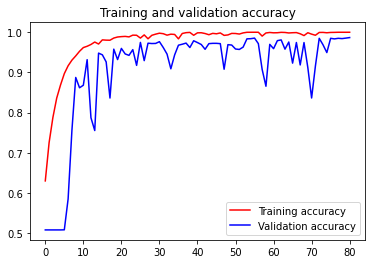

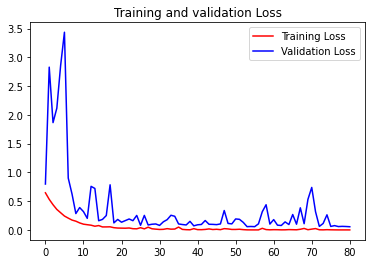

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
p = model.predict(X_test)

257/257 [==============================] - 1s 4ms/step


In [ ]:
p.shape

(8212, 1)

In [ ]:
#from tensorflow.keras.utils import to_categorical
#pred = to_categorical(np.argmax(p, axis=1), 2)

In [ ]:
pred = np.where(p > 0.50, 1,0)
pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
ind = 8200
print(pred[ind],y_test[ind])

[0] 0.0


In [ ]:
y_val

array([1., 1., 1., ..., 0., 0., 0.])